### Crawling 
- 데이터 수집
- 페이지의 정보를 요청 후 응답 받아 필요한 데이터를 수집하는 행위 

##### requests 라이브러리 
- 서버에게 페이지정보(데이터)를 요청하고 응답 받기 위한 라이브러리 
- 브라우저 대신 

In [2]:
# 라이브러리 불러오기 
import requests as req

In [5]:
# 네이버 페이지의 정보를 요청하여 응답받기 (requests 라이브러리 활용)
url = 'https://www.naver.com/'
res = req.get(url) # 페이지 정보 가져와줘~ 
# Response[200]: 성공적으로 페이지 정보를 응답 받음 
# Response[400]: 클라이언트 pc에서 요청상의 문제가 있을 때 
# Response[500]: 서버 pc에서 응답상의 문제가 있을 때 

In [8]:
# 확인 (네이버 페이지의 정보를 잘 받아왔는지)
res.text
# 요청한 페이지의 html 정보를 확인할 수 있음 
# 이때 우리가 응답받은 데이터의 형태는 ? => 문자열 !! 
# 데이터를 효율적으로 추출하기 위해서는 html 코드로 변환

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

- 페이지 정보가 업데이트 되면 반드시 다시 페이지 정보를 요청하여 응답 받아야 한다 

In [15]:
# '푸바오'를 검색한 페이지의 정보를 요청, 응답하기 
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%ED%91%B8%EB%B0%94%EC%98%A4'
res = req.get(url)
res.text
# 응답 받은 데이터 형태 > 문자열 > html 코드로 변환 (태그를 통한 데이터 수집)

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="푸바오 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'푸바오\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'푸바오\'의 네이버 통합검색 결과입니다."> <title>푸바오 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240215b.css"> <link rel="stylesheet" type="text/css" hr

##### BeautifulSoup 라이브러리 ❗
- 컴퓨터가 이해할 수 있는 언어로 변경해주는 라이브러리 (파싱/parsing)
- 뷰티풀숩 객체화 

In [13]:
# 라이브러리 불러오기 
from bs4 import BeautifulSoup as bs

In [18]:
# bs 객체화
# bs(페이지 정보, 파싱방법)
soup = bs(res.text, 'lxml')
# F12 개발자모드에서의 페이지 정보를 soup이 담고 있음

- 네이버 탭 데이터 수집하기 <br>
(요소 = element)
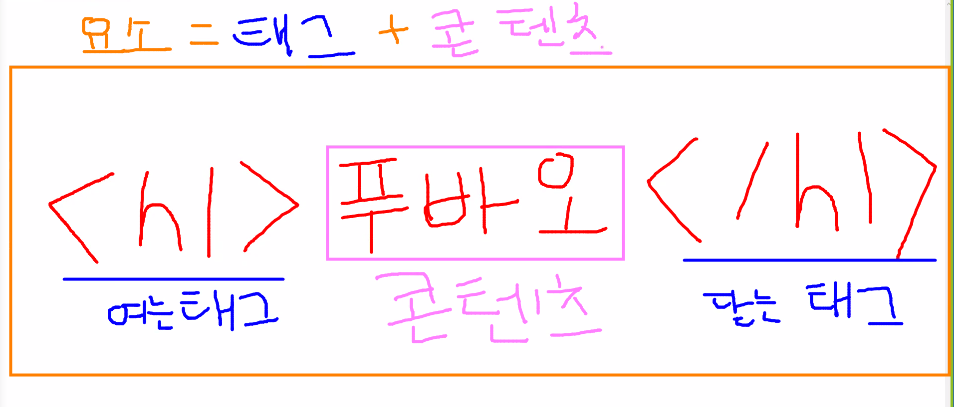
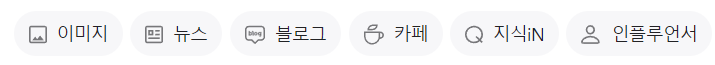

In [ ]:
# '이미지' 글자를 추출하기 위해서 태그를 선택 
soup.select('a')
# 모든 a태그를 수집 

In [21]:
# 정확한 태그 정보를 선택하는 것이 중요 !! (구분자, 선택자 등을 활용 )
# id 선택자 (#), class 선택자 (.)
# soup.select('태그이름 선택자기호 선택자이름')
data = soup.select('a.tab')
# 여러개의 데이터이기 때문에 이르스에 담겨 출력
data

[<a aria-selected="false" class="tab" href="?ssc=tab.image.all&amp;where=image&amp;sm=tab_jum&amp;query=%ED%91%B8%EB%B0%94%EC%98%A4" onclick="return goOtherCR(this,'a=tab*i.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_image"></i>이미지</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.news.all&amp;where=news&amp;sm=tab_jum&amp;query=%ED%91%B8%EB%B0%94%EC%98%A4" onclick="return goOtherCR(this,'a=tab*n.jmp&amp;r=2&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_news"></i>뉴스</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%ED%91%B8%EB%B0%94%EC%98%A4" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=3&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.cafe.all&amp;sm=tab_jum&amp;query=%ED%91%B8%EB%B0%94%EC%98%A4" onclick="return goOtherCR(this,'a=tab*c.jmp&amp;r=4&amp;i=&amp;u='

In [36]:
# 우리가 필요한 순수한 콘텐츠만을 추출 '이미지'
# 요소.text
data[0].text
news = data

In [ ]:
# 반복문을 통해서 모든 데이터 추출 
for i in range(len(data)) :
    print(data[i].text)

- 키워드 검색결과 뉴스 제목 수집하기!

In [28]:
# 페이지 정보 'soup'에서 뉴스 제목 추출하기 
# 요소 추출 
# 순수한 콘텐츠만을 추출 
data = soup.select('a.news_tit')
data
for i in range(len(data)) :
    print(data[i].text)

푸바오 잘 가···마지막 작별 날짜 나왔다
푸바오 마지막으로 볼 날은 '3월 3일'…이후 검역 위해 비공개
삼성전자, 푸바오 쌍둥이 동생 똑닮은 '갤럭시 버즈' 패키지 출시
'용인 푸씨' 판다 푸바오, 명예 용인특례시민 되다 (B tv 기남뉴스)


In [47]:
for i in news:
    print(i.text)

푸바오 잘 가···마지막 작별 날짜 나왔다
푸바오 마지막으로 볼 날은 '3월 3일'…이후 검역 위해 비공개
삼성전자, 푸바오 쌍둥이 동생 똑닮은 '갤럭시 버즈' 패키지 출시
'용인 푸씨' 판다 푸바오, 명예 용인특례시민 되다 (B tv 기남뉴스)


- 네이버에서 '날씨' 검색 후에 온도 수집

In [49]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%A0%EC%94%A8'
res = req.get(url)
res.text
soup = bs(res.text, 'lxml')
soup.select('div.temperature_text > strong')[0].text

'현재 온도11.2°'

In [52]:
ex = soup.select_one('div.temperature_text > strong')
ex.text
# select_one 기능을 사용하면 요소 형태로 추출되기 때문에 리스트 인덱싱 해줄 필요 없이 바로 text 속성 사용 가능 
# 깔끔한 코드 작성을 위해 사용(최상단 데이터 하나만 가져와도 될 때)

'현재 온도11.2°'

- select , select_one 차이점 ❗
> <b> select </b>: 해당하는 모든 태그를 리스트로 출력 => 리스트 형태로 출력 <br>
> <b> select_one </b>: 해당되는 요소 중 가장 상단에 있는 요소 추출